### Feature Engineering

One way to optimaze the dataset before the training process. The data that being used here is from the sklearn dataset.

In [17]:
from sklearn.datasets import make_classification
 
X, y = make_classification(n_samples=1000, n_features=15, n_informative=10, n_redundant=2,n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=42)

In [18]:
## Convert into DataFrame
import pandas as pd
import numpy as np

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 16)])
df['target'] = y

## Make some categorical data
df["feature_12"] = np.random.choice(['A', 'B', 'C'], size=1000)
df["feature_13"] = np.random.choice(['X', 'Y', 'Z'], size=1000)

df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,B,X,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,B,Z,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,B,Y,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,B,X,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,C,Y,0.712335,2.810524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.927482,-0.017325,4.884411,0.542628,3.033376,-1.904407,0.953035,1.278882,-1.293396,1.772169,-1.191263,C,X,-0.387151,-2.629004,0
996,0.347761,-1.690916,5.949207,-2.289729,2.238469,-0.067922,-0.069702,-1.436622,-2.153011,-0.867583,3.962758,B,X,0.886822,-1.248408,0
997,1.201967,-1.263417,-1.331925,-2.468434,1.777577,2.270456,-0.431749,-1.846263,1.753033,1.858452,4.264568,B,X,0.067260,0.931995,1
998,-2.127846,-0.975838,0.279144,0.151578,-0.443749,0.650616,-1.410265,-1.017319,-0.643070,2.142898,3.399255,A,Z,-0.128774,0.800834,0


### Split the feature and target

In [19]:
## Split the feature and target
X = df.drop(columns=['target'], axis=1)
y = df['target']

## See the class distribution before SMOTE
print(f"Distribution class before SMOTE: {y.value_counts()}")

Distribution class before SMOTE: target
0    901
1     99
Name: count, dtype: int64


### Using the Embedded Methods for Feature Selection

Well, we're using the complex technique one.

In [20]:
## Embedded Methods
## Using Random Forst for getting the important features
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_integer = X.drop(columns=['feature_12', 'feature_13'], axis=1)
rf_model.fit(X_integer, y)

## Get the important features
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

## Set threshold for the important features
threshold = 0.05 # 5%
important_features_indicies = [i for i in range(len(importances)) if importances[i] >= threshold]

## Show the important features and its value
print(f"Important feature")
for i in important_features_indicies:
    print(f"{X.columns[i]}: {importances[i]}")

## Get the name important name column
important_features = X_integer.columns[important_features_indicies]

## Move the important features to the new dataframe
X_important = X_integer[important_features]

## X_important is the new dataframe that contains only the important features
X_important


Important feature
feature_2: 0.11860019897866206
feature_3: 0.06878603593465271
feature_5: 0.07731131335837178
feature_8: 0.050482655781999855
feature_9: 0.2625049418105367
feature_10: 0.08958259568334655
feature_11: 0.06365230544114515
feature_13: 0.12578161860669113


,feature_2,feature_3,feature_5,feature_8,feature_9,feature_10,feature_11,feature_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834


What about categorical value? We can combine both with our selection feature

In [21]:
X_Selected = pd.concat([X_important, X['feature_12']], axis=1)
X_Selected = pd.concat([X_Selected, X['feature_13']], axis=1)
X_Selected

,feature_2,feature_3,feature_5,feature_8,feature_9,feature_10,feature_11,feature_15,feature_12,feature_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,B,X
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,B,Z
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,B,Y
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,B,X
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,C,Y
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,C,X
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,B,X
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,B,X
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,A,Z


We can doing the encoding for categorical data, for this purpose let's use the Label Encoding because the data has some sequence pattern

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

## Encode the feature_12 and feature_13
X_Selected['feature_12'] = label_encoder.fit_transform(X_Selected['feature_12'])
X_Selected['feature_13'] = label_encoder.fit_transform(X_Selected['feature_13'])

## Show the encoded feature
X_Selected

,feature_2,feature_3,feature_5,feature_8,feature_9,feature_10,feature_11,feature_15,feature_12,feature_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,1,0
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,1,2
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,1,1
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,1,0
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,2,1
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,2,0
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,1,0
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,1,0
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,0,2


### Notes

We need to take care of the Outlier also, let's working on the feature 12 and 13.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Choose the numeric column and drop feature 12 and 13
numeric_column = X_Selected.select_dtypes(include=[np.number]).columns
numeric_column = numeric_column.drop(['feature_12', 'feature_13'])

## Copy the data
X_cleaned = X_important.copy()

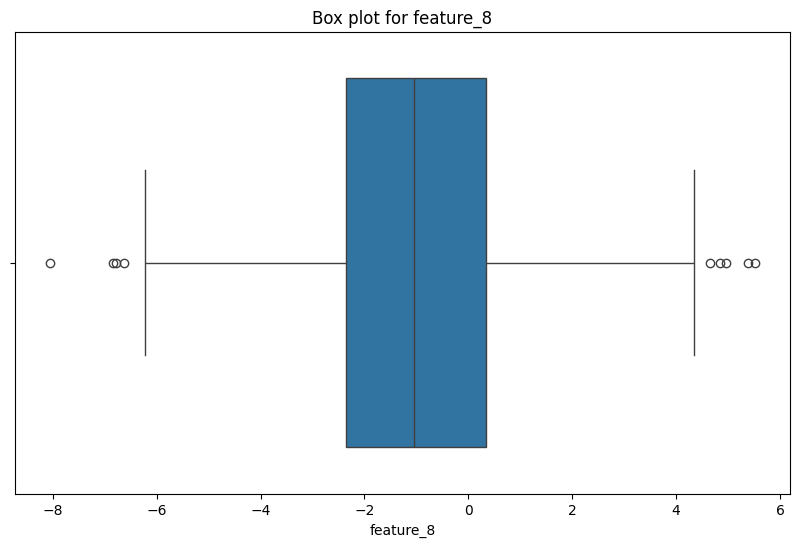

In [24]:
## Show the Boxplot for feature 8
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_Selected['feature_8'])
plt.title('Box plot for feature_8')
plt.show()

As you can see, we have an outlier, and one way to remove it is by using the IQR (Interquartile Range)

In [25]:
## Using the IQR for removing the outlier
for col in numeric_column:
    Q1 = X_cleaned[col].quantile(0.25)
    Q3 = X_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    X_cleaned = X_cleaned[(X_cleaned[col] >= (Q1 - 1.5 * IQR)) & (X_cleaned[col] <= (Q3 + 1.5 * IQR))]
    lower_bound = (Q1 - 1.5 * IQR)
    upper_bound = (Q3 + 1.5 * IQR)
    print(f"Lower bound for {col}: {lower_bound}")
    print(f"Upper bound for {col}: {upper_bound}")

    ## Identify the Outlier
    outliers = X_cleaned[(X_cleaned[col] < (Q1 - 1.5 * IQR)) | (X_cleaned[col] > (Q3 + 1.5 * IQR))]

    ## Delete the outlier
    X_cleaned = X_cleaned.drop(outliers.index)


Lower bound for feature_2: -5.702733548825612
Upper bound for feature_2: 4.067062399296426
Lower bound for feature_3: -10.044902364477064
Upper bound for feature_3: 10.999016247489397
Lower bound for feature_5: -6.3447320517880605
Upper bound for feature_5: 4.973031937863724
Lower bound for feature_8: -6.395290042268609
Upper bound for feature_8: 4.384306233961516
Lower bound for feature_9: -4.378800467279145
Upper bound for feature_9: 2.6199272021318327
Lower bound for feature_10: -4.327690720202639
Upper bound for feature_10: 5.90812052630173
Lower bound for feature_11: -6.021291299409148
Upper bound for feature_11: 10.914369660946308
Lower bound for feature_15: -3.9566039951057386
Upper bound for feature_15: 5.651387053566061


In [26]:
X_cleaned

,feature_2,feature_3,feature_5,feature_8,feature_9,feature_10,feature_11,feature_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
994,-2.041914,-0.803401,-0.697435,2.116836,-1.075422,2.308076,-0.972784,0.056426
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995


### Imbalence Data
As you can see, we set the dataset train with proportion 90-10 with 90 in first class and 10 in second class. 

We can solve this by doing oversampling / undersampling until we have balanced proportion.

One way is to doing SMOTE (Synthetic Minority Oversampling Technique)

In [32]:
## Initalize SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

## Trim y to match with the X_cleaned (944 rows) in rows
y = y[:944]

## Doing oversampling on the dataset
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y)

## Show the distribution class after SMOTE
print(f"Distribution class after SMOTE: {y_resampled.value_counts()}")

## Convert into DataFrame
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled, name='Target')



Distribution class after SMOTE: target
0    850
1    850
Name: count, dtype: int64


c:\Users\ACER\miniconda3\envs\codex_astartes\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\ACER\miniconda3\envs\codex_astartes\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


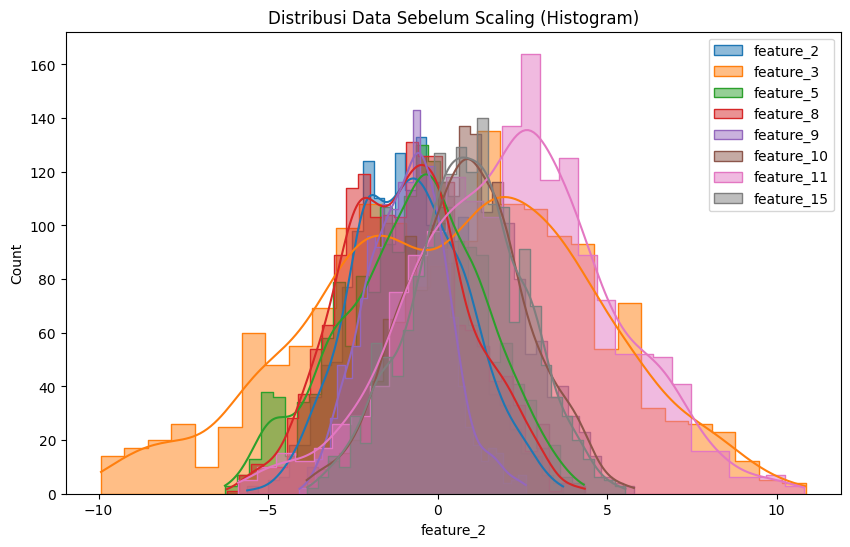

In [33]:
## Visualize the distribution class after SMOTE
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Sebelum Scaling (Histogram)')
plt.legend()
plt.show()

Let's do scaling, use the Standarization to make sure it has mean 0 and sd of 1

In [34]:
## Scaling the data using Standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_resampled[important_features] = scaler.fit_transform(X_resampled[important_features])

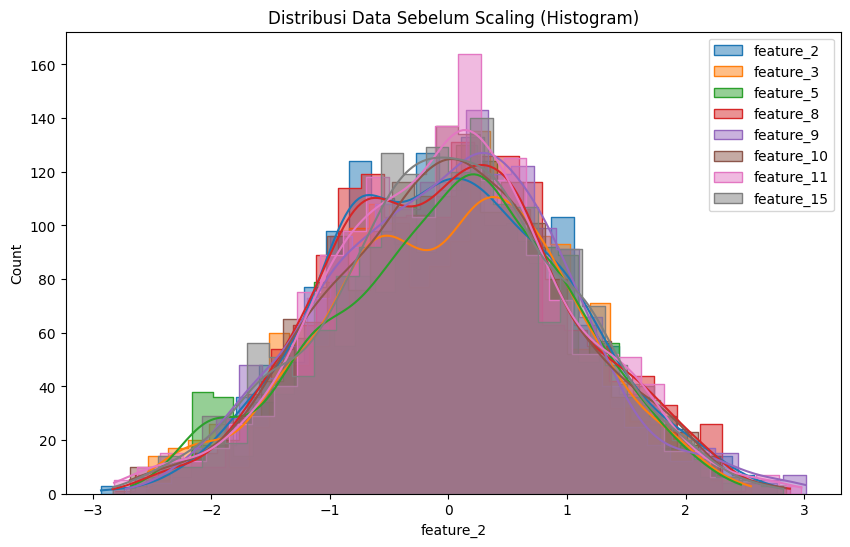

In [35]:
## Visualize the distribution class after Scaling
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Sebelum Scaling (Histogram)')
plt.legend()
plt.show()

In [36]:
### Check the dataset statistic properties
X_resampled.describe()

,feature_2,feature_3,feature_5,feature_8,feature_9,feature_10,feature_11,feature_15
count,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03
mean,-5.851528e-17,-3.343731e-17,-9.195259e-17,7.105427e-17,-8.359326e-18,2.142077e-17,4.179663e-17,2.925764e-17
std,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00
min,-2.930032e+00,-2.531372e+00,-2.674596e+00,-2.832332e+00,-2.721019e+00,-2.686097e+00,-2.819535e+00,-2.828718e+00
25%,-7.530270e-01,-7.017592e-01,-6.731105e-01,-7.352116e-01,-7.222245e-01,-6.820255e-01,-6.795689e-01,-6.406922e-01
50%,-2.145201e-02,7.890387e-02,7.993748e-02,2.271448e-02,3.446122e-02,1.188977e-02,2.500234e-02,1.053904e-02
75%,7.177487e-01,7.150422e-01,7.090030e-01,6.656270e-01,6.708306e-01,6.560995e-01,6.332212e-01,6.831273e-01
max,2.767094e+00,2.549928e+00,2.465742e+00,2.878810e+00,3.010995e+00,2.841969e+00,2.976130e+00,2.823086e+00
